# SIR модель #
Работа выполнена студентом группы 23КНТ2 ИМИКН ВШЭ НН ***Власовым Артёмом Дмитриевичем***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Великобритания.xlsx', sheet_name='Sheet1')
df.head()

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день
0,Великобритания,20.07.2020,296940,1413.0,41090,586,0.0,10,63181775,8256935,121693
1,Великобритания,21.07.2020,297385,1414.0,41115,445,1.0,25,63181775,8388397,131462
2,Великобритания,22.07.2020,297948,1416.0,41132,563,2.0,17,63181775,8522679,134282
3,Великобритания,23.07.2020,298727,1425.0,41141,779,9.0,9,63181775,8663993,141314
4,Великобритания,24.07.2020,299495,1425.0,41173,768,0.0,32,63181775,8798036,134043


In [3]:
df.tail()

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день
604,Великобритания,16.03.2022,20059641,NaN,163833,93943,NaN,153,63181775,476632060,853716
605,Великобритания,17.03.2022,20150847,NaN,163972,91206,NaN,139,63181775,477378853,746793
606,Великобритания,18.03.2022,20243940,NaN,164099,93093,NaN,127,63181775,477950504,571651
607,Великобритания,19.03.2022,20243940,NaN,164099,0,NaN,0,63181775,478578610,628106
608,Великобритания,20.03.2022,20243940,NaN,164099,0,NaN,0,63181775,0,0


Смотрим, в какие столбцах есть пропуски

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Страна                 609 non-null    object 
 1   Дата                   609 non-null    object 
 2   Заражений              609 non-null    int64  
 3   Выздоровлений          381 non-null    float64
 4   Смертей                609 non-null    int64  
 5   Заражений за день      609 non-null    int64  
 6   Выздоровлений за день  381 non-null    float64
 7   Смертей за день        609 non-null    int64  
 8   Население страны       609 non-null    int64  
 9   Тестов                 609 non-null    int64  
 10  Тестов за день         609 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 52.5+ KB
None


# Работает с пропущенными значениями c использованием линейной регрессии

Как мы видим, начиная с 381 строки в столбцах **'Выздоровлений за день'** и **'Выздоровлений'** вместо данных идут пропуски. Используем линейную регрессию, чтобы обучить на первых 300+ строках, а затем предсказать недостающие значения.

Перейдём к следующим шагам:

1. Построим модель линейной регрессии по непустым данным.

2. Применим её к строкам с пропущенными значениями.

3. Заполним пропуски предсказаниями модели.

In [5]:
data_before = df.iloc[:380].copy()

# Рассчитываем среднее количество выздоровлений за день
mean_recovery_per_day = data_before['Выздоровлений за день'].mean()
print(f"Среднее количество выздоровлений за день: {mean_recovery_per_day:.2f}")

Среднее количество выздоровлений за день: 60.41


In [6]:
# Создаем временной индекс
df["index"] = df.index

In [7]:
# Ensure the 'index' column exists in data_before
data_before["index"] = data_before.index

X = data_before[["index", 'Заражений за день', 'Тестов за день']].values
y = data_before['Выздоровлений за день'].values

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
data_missing = df.iloc[380:].copy()

# Предсказываем выздоровления за день на основе заражений за день
X_missing = data_missing[['index', 'Заражений за день', 'Тестов за день']].values
predicted_recoveries = model.predict(X_missing)

# Округляем предсказания, так как выздоровления — целые числа
predicted_recoveries = np.round(predicted_recoveries).astype(int)

# Заполняем пропуски в исходном датафрейме
df.loc[380:, 'Выздоровлений за день'] = predicted_recoveries

In [10]:
df

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день,index
0,Великобритания,20.07.2020,296940,1413.0,41090,586,0.0,10,63181775,8256935,121693,0
1,Великобритания,21.07.2020,297385,1414.0,41115,445,1.0,25,63181775,8388397,131462,1
2,Великобритания,22.07.2020,297948,1416.0,41132,563,2.0,17,63181775,8522679,134282,2
3,Великобритания,23.07.2020,298727,1425.0,41141,779,9.0,9,63181775,8663993,141314,3
4,Великобритания,24.07.2020,299495,1425.0,41173,768,0.0,32,63181775,8798036,134043,4
...,...,...,...,...,...,...,...,...,...,...,...,...
604,Великобритания,16.03.2022,20059641,NaN,163833,93943,370.0,153,63181775,476632060,853716,604
605,Великобритания,17.03.2022,20150847,NaN,163972,91206,364.0,139,63181775,477378853,746793,605
606,Великобритания,18.03.2022,20243940,NaN,164099,93093,369.0,127,63181775,477950504,571651,606
607,Великобритания,19.03.2022,20243940,NaN,164099,0,152.0,0,63181775,478578610,628106,607


Теперь мы можем избавиться от пропусков в столбце **'Выздоровлений'**, просто просуммировав значения предыдущей ячейки **'Выздоровлений'** и сегодняшней статистики из **'Выздоровлений за день'**. Но для начала узнаем с какой строки начинаются пропуски данных в столбце

In [11]:
df[df["Выздоровлений"].isnull()]

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день,index
381,Великобритания,05.08.2021,6010860,NaN,130388,30030,154.0,90,63181775,238855296,822864,381
382,Великобритания,06.08.2021,6042493,NaN,130481,31633,158.0,93,63181775,239532985,677689,382
383,Великобритания,07.08.2021,6070872,NaN,130585,28379,150.0,104,63181775,240238517,705532,383
384,Великобритания,08.08.2021,6098140,NaN,130630,27268,148.0,45,63181775,241006064,767547,384
385,Великобритания,09.08.2021,6123155,NaN,130667,25015,143.0,37,63181775,241784810,778746,385
...,...,...,...,...,...,...,...,...,...,...,...,...
604,Великобритания,16.03.2022,20059641,NaN,163833,93943,370.0,153,63181775,476632060,853716,604
605,Великобритания,17.03.2022,20150847,NaN,163972,91206,364.0,139,63181775,477378853,746793,605
606,Великобритания,18.03.2022,20243940,NaN,164099,93093,369.0,127,63181775,477950504,571651,606
607,Великобритания,19.03.2022,20243940,NaN,164099,0,152.0,0,63181775,478578610,628106,607


Теперь можно начать считать данные

In [12]:
start_index = 381

# Вычисляем значения для столбца 'Выздоровлений' начиная с 381 строки
for i in range(start_index, len(df)):
    df.loc[i, 'Выздоровлений'] = df.loc[i-1, 'Выздоровлений'] + df.loc[i, 'Выздоровлений за день']

Проверяем работу

In [13]:
df[df["Выздоровлений"].isnull()]

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день,index


In [14]:
df

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день,index
0,Великобритания,20.07.2020,296940,1413.0,41090,586,0.0,10,63181775,8256935,121693,0
1,Великобритания,21.07.2020,297385,1414.0,41115,445,1.0,25,63181775,8388397,131462,1
2,Великобритания,22.07.2020,297948,1416.0,41132,563,2.0,17,63181775,8522679,134282,2
3,Великобритания,23.07.2020,298727,1425.0,41141,779,9.0,9,63181775,8663993,141314,3
4,Великобритания,24.07.2020,299495,1425.0,41173,768,0.0,32,63181775,8798036,134043,4
...,...,...,...,...,...,...,...,...,...,...,...,...
604,Великобритания,16.03.2022,20059641,83754.0,163833,93943,370.0,153,63181775,476632060,853716,604
605,Великобритания,17.03.2022,20150847,84118.0,163972,91206,364.0,139,63181775,477378853,746793,605
606,Великобритания,18.03.2022,20243940,84487.0,164099,93093,369.0,127,63181775,477950504,571651,606
607,Великобритания,19.03.2022,20243940,84639.0,164099,0,152.0,0,63181775,478578610,628106,607


Удаляем столбец **'Страна'**, **'Тестов'**, **'Тестов за день''**, **'Смертей за день'** и **'index'** поскольку он не несёт никакой полезной информации

In [ ]:
df.drop(columns=['Страна'], inplace=True)
df.drop(columns=['Тестов'], inplace=True)
df.drop(columns=['Тестов за день'], inplace=True)
df.drop(columns=['index'], inplace=True)
df.head()

,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны
0,20.07.2020,296940,1413.0,41090,586,0.0,10,63181775
1,21.07.2020,297385,1414.0,41115,445,1.0,25,63181775
2,22.07.2020,297948,1416.0,41132,563,2.0,17,63181775
3,23.07.2020,298727,1425.0,41141,779,9.0,9,63181775
4,24.07.2020,299495,1425.0,41173,768,0.0,32,63181775


### 1. Вычислить количество инфицированных I на каждый день наблюдений

In [16]:
df['Инфицированные_I'] = df['Заражений'] - df['Выздоровлений'] - df['Смертей']
df['Восприимчивые_S'] = df['Население страны'] - df['Заражений']
df.head()

,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Инфицированные_I,Восприимчивые_S
0,20.07.2020,296940,1413.0,41090,586,0.0,10,63181775,254437.0,62884835
1,21.07.2020,297385,1414.0,41115,445,1.0,25,63181775,254856.0,62884390
2,22.07.2020,297948,1416.0,41132,563,2.0,17,63181775,255400.0,62883827
3,23.07.2020,298727,1425.0,41141,779,9.0,9,63181775,256161.0,62883048
4,24.07.2020,299495,1425.0,41173,768,0.0,32,63181775,256897.0,62882280


### 2. Выполнить нормировку данных на 100 тыс. населения

In [17]:
population = df['Население страны'].iloc[0]

# Нормировка данных на 100k населения
df['Заражений_норм'] = (df['Заражений'] / population) * 100000
df['Выздоровлений_норм'] = (df['Выздоровлений'] / population) * 100000
df['Смертей_норм'] = (df['Смертей'] / population) * 100000
df['Заражений_за_день_норм'] = (df['Заражений за день'] / population) * 100000
df['Выздоровлений_за_день_норм'] = (df['Выздоровлений за день'] / population) * 100000
df['I_норм'] = (df['Инфицированные_I'] / population) * 100000

In [18]:
df.head()

,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Инфицированные_I,Восприимчивые_S,Заражений_норм,Выздоровлений_норм,Смертей_норм,Заражений_за_день_норм,Выздоровлений_за_день_норм,I_норм
0,20.07.2020,296940,1413.0,41090,586,0.0,10,63181775,254437.0,62884835,469.977300,2.236404,65.034577,0.927483,0.000000,402.706318
1,21.07.2020,297385,1414.0,41115,445,1.0,25,63181775,254856.0,62884390,470.681617,2.237987,65.074145,0.704317,0.001583,403.369484
2,22.07.2020,297948,1416.0,41132,563,2.0,17,63181775,255400.0,62883827,471.572696,2.241153,65.101052,0.891080,0.003165,404.230492
3,23.07.2020,298727,1425.0,41141,779,9.0,9,63181775,256161.0,62883048,472.805647,2.255397,65.115296,1.232950,0.014245,405.434953
4,24.07.2020,299495,1425.0,41173,768,0.0,32,63181775,256897.0,62882280,474.021187,2.255397,65.165944,1.215540,0.000000,406.599846


### 3.На основе данных построить оценку параметра γ – интенсивности выздоровления

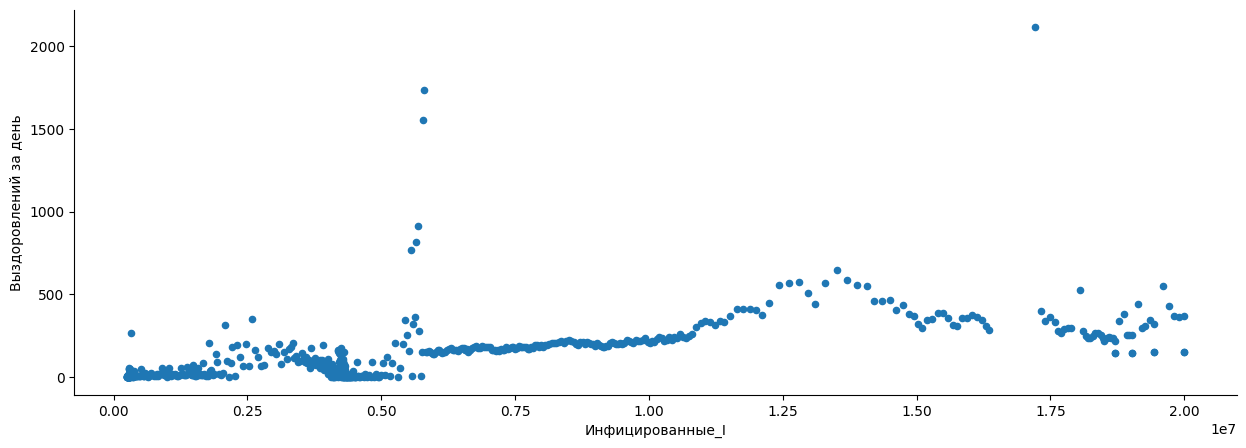

In [19]:
df.plot(kind='scatter', x='Инфицированные_I', y='Выздоровлений за день',figsize=(15, 5))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [20]:
# 4. Оценка параметра γ (gamma)
df['dR/dt'] = df['Выздоровлений за день'] / df['Инфицированные_I']
gamma = df['dR/dt'].replace([np.inf, -np.inf], np.nan).mean()
print(f"Оценка параметра γ (gamma): {gamma:.6f}")

Оценка параметра γ (gamma): 0.000025


In [21]:
df['gamma'] = df['Выздоровлений за день']/ df['Инфицированные_I']

# Удаление бесконечных или NaN значений (например, если I = 0)
df['gamma'] = df['gamma'].replace([float('inf'), -float('inf')], 0).fillna(0)

gamma_mean = df['gamma'].mean()

# Вывод первых строк и средней gamma
print(f"Средняя интенсивность выздоровления (γ): {gamma_mean:.6f}")

Средняя интенсивность выздоровления (γ): 0.000025


### 4. С помощью метода наименьших квадратов построить оценку параметра SIR-модели β (интенсивность заражения) в предположении, что изначально все население является восприимчивым к заболеванию.

In [23]:
df.head()

,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Инфицированные_I,Восприимчивые_S,Заражений_норм,Выздоровлений_норм,Смертей_норм,Заражений_за_день_норм,Выздоровлений_за_день_норм,I_норм,dR/dt,gamma
0,20.07.2020,296940,1413.0,41090,586,0.0,10,63181775,254437.0,62884835,469.977300,2.236404,65.034577,0.927483,0.000000,402.706318,0.000000,0.000000
1,21.07.2020,297385,1414.0,41115,445,1.0,25,63181775,254856.0,62884390,470.681617,2.237987,65.074145,0.704317,0.001583,403.369484,0.000004,0.000004
2,22.07.2020,297948,1416.0,41132,563,2.0,17,63181775,255400.0,62883827,471.572696,2.241153,65.101052,0.891080,0.003165,404.230492,0.000008,0.000008
3,23.07.2020,298727,1425.0,41141,779,9.0,9,63181775,256161.0,62883048,472.805647,2.255397,65.115296,1.232950,0.014245,405.434953,0.000035,0.000035
4,24.07.2020,299495,1425.0,41173,768,0.0,32,63181775,256897.0,62882280,474.021187,2.255397,65.165944,1.215540,0.000000,406.599846,0.000000,0.000000


In [24]:
# Функция для минимизации (МНК)
def beta_loss(beta, S, I, Delta_I, gamma, N):
    predicted_Delta_I = beta * (S * I / N) - gamma * I
    return np.sum((predicted_Delta_I - Delta_I) ** 2)

In [25]:
from scipy.optimize import minimize

# Вычисление S и R
N = df['Население страны'].iloc[0]
df['R'] = df['Выздоровлений'] + df['Смертей']
df['S'] = N - df['Инфицированные_I'] - df['R']

# Вычисление ΔI
df['Delta_I'] = df['Заражений за день'] - df['Выздоровлений за день'] - df['Смертей за день']

# Разбиение на интервалы (например, по 7 дней)
interval_size = 7
beta_estimates = []

for start in range(0, len(df), interval_size):
    end = min(start + interval_size, len(df))
    interval_df = df.iloc[start:end]
    
    # Начальное значение beta
    beta0 = 0.1
    
    # Минимизация
    result = minimize(
        beta_loss,
        beta0,
        args=(
            interval_df['S'].values,
            interval_df['Инфицированные_I'].values,
            interval_df['Delta_I'].values,
            gamma_mean,
            N
        ),
        method='Nelder-Mead'
    )
    
    beta_estimates.append({
        'interval': f'{interval_df["Дата"].iloc[0]} - {interval_df["Дата"].iloc[-1]}',
        'beta': result.x[0]
    })

# Вывод результатов
for estimate in beta_estimates:
    print(f"Интервал: {estimate['interval']}, β = {estimate['beta']:.6f}")

Интервал: 20.07.2020 - 26.07.2020, β = 0.002561
Интервал: 27.07.2020 - 02.08.2020, β = 0.002874
Интервал: 03.08.2020 - 09.08.2020, β = 0.003351
Интервал: 10.08.2020 - 16.08.2020, β = 0.004035
Интервал: 17.08.2020 - 23.08.2020, β = 0.003692
Интервал: 24.08.2020 - 30.08.2020, β = 0.004436
Интервал: 31.08.2020 - 06.09.2020, β = 0.006074
Интервал: 07.09.2020 - 13.09.2020, β = 0.009551
Интервал: 14.09.2020 - 20.09.2020, β = 0.010845
Интервал: 21.09.2020 - 27.09.2020, β = 0.015573
Интервал: 28.09.2020 - 04.10.2020, β = 0.023676
Интервал: 05.10.2020 - 11.10.2020, β = 0.027862
Интервал: 12.10.2020 - 18.10.2020, β = 0.027079
Интервал: 19.10.2020 - 25.10.2020, β = 0.028363
Интервал: 26.10.2020 - 01.11.2020, β = 0.025109
Интервал: 02.11.2020 - 08.11.2020, β = 0.020975
Интервал: 09.11.2020 - 15.11.2020, β = 0.020605
Интервал: 16.11.2020 - 22.11.2020, β = 0.014599
Интервал: 23.11.2020 - 29.11.2020, β = 0.009884
Интервал: 30.11.2020 - 06.12.2020, β = 0.009406
Интервал: 07.12.2020 - 13.12.2020, β = 0

# 5. Построить график зависимости среднего количества инфицированных от времени. Для сравнения на той же диаграмме построить график для реальных (нормированных) данных

In [39]:
df['I_норм']

0        402.706318
1        403.369484
2        404.230492
3        405.434953
4        406.599846
           ...     
604    31357.229201
605    31500.788004
606    31647.344507
607    31647.103931
608    31646.861773
Name: I_норм, Length: 609, dtype: float64

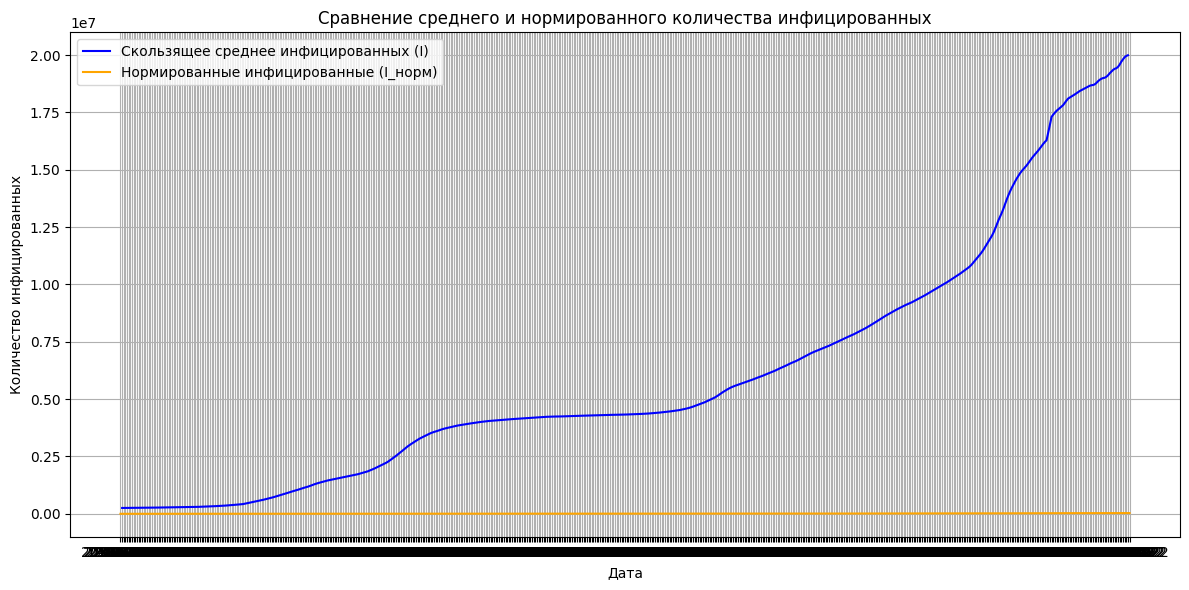

In [38]:
# Вычислим скользящее среднее по числу инфицированных (например, 3-дневное)
df['Инфицированные_I_среднее'] = df['Инфицированные_I'].rolling(window=3, center=True).mean()

# Построим график
plt.figure(figsize=(12, 6))
plt.plot(df['Дата'], df['Инфицированные_I_среднее'], label='Скользящее среднее инфицированных (I)', color='blue')
plt.plot(df['Дата'], df['I_норм'], label='Нормированные инфицированные (I_норм)', color='orange', linestyle='-')

plt.xlabel('Дата')
plt.ylabel('Количество инфицированных')
plt.title('Сравнение среднего и нормированного количества инфицированных')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

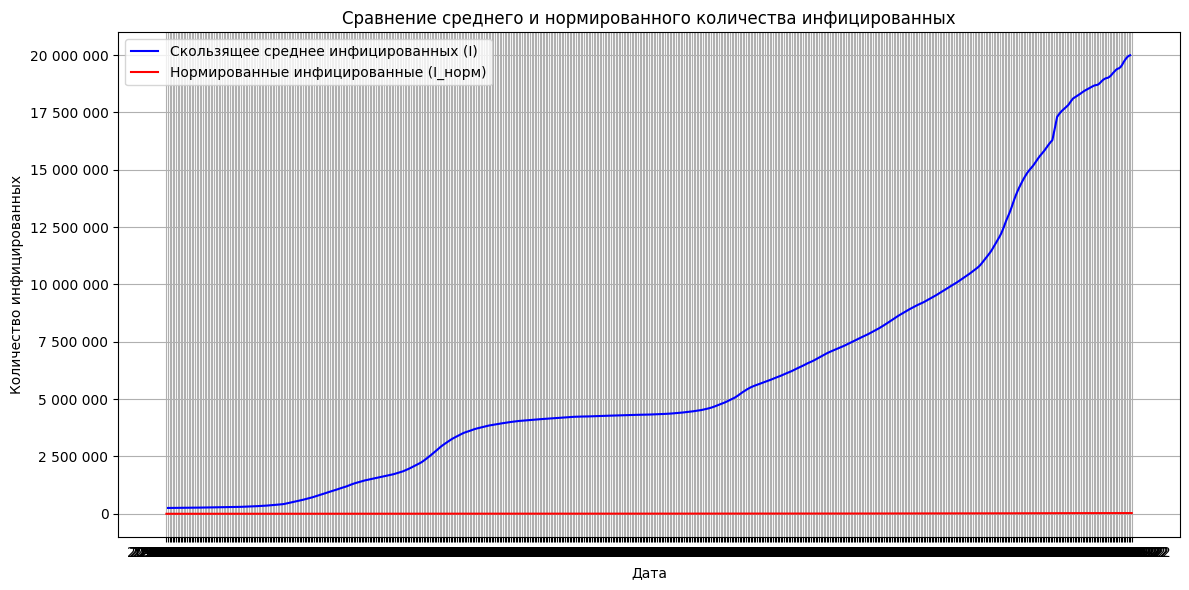

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))
plt.plot(df['Дата'], df['Инфицированные_I_среднее'], label='Скользящее среднее инфицированных (I)', color='blue')
plt.plot(df['Дата'], df['I_норм'], label='Нормированные инфицированные (I_норм)', color='red', linestyle='-')

plt.xlabel('Дата')
plt.ylabel('Количество инфицированных')
plt.title('Сравнение среднего и нормированного количества инфицированных')
plt.legend()
plt.grid(True)

# Форматирование оси Y: обычные числа вместо экспоненты
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))

plt.tight_layout()
plt.show()